In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df = pd.read_csv('/content/drive/MyDrive/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [28]:
df.rename(columns = {'Genre':'Gender', 'Annual Income (k$)' : 'Income' , 'Spending Score (1-100)' : 'Score'} , inplace = True)

**Data Understanding**

In [29]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Income', 'Score'], dtype='object')

In [30]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [31]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [32]:
df['Age'].unique()

array([19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 24, 37, 52, 25, 46, 54,
       29, 45, 40, 60, 53, 18, 49, 42, 36, 65, 48, 50, 27, 33, 59, 47, 51,
       69, 70, 63, 43, 68, 32, 26, 57, 38, 55, 34, 66, 39, 44, 28, 56, 41])

In [33]:
df['Age'].value_counts()

32    11
35     9
19     8
31     8
30     7
49     7
40     6
38     6
47     6
27     6
36     6
23     6
34     5
20     5
29     5
50     5
48     5
21     5
24     4
18     4
28     4
67     4
59     4
54     4
43     3
60     3
45     3
39     3
33     3
37     3
22     3
25     3
46     3
68     3
52     2
44     2
66     2
57     2
26     2
53     2
42     2
63     2
70     2
51     2
58     2
65     2
41     2
55     1
69     1
64     1
56     1
Name: Age, dtype: int64

In [34]:
df['Income'].unique()

array([ 15,  16,  17,  18,  19,  20,  21,  23,  24,  25,  28,  29,  30,
        33,  34,  37,  38,  39,  40,  42,  43,  44,  46,  47,  48,  49,
        50,  54,  57,  58,  59,  60,  61,  62,  63,  64,  65,  67,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  81,  85,  86,
        87,  88,  93,  97,  98,  99, 101, 103, 113, 120, 126, 137])

In [35]:
df['Income'].value_counts()

54     12
78     12
48      6
71      6
63      6
       ..
58      2
59      2
16      2
64      2
137     2
Name: Income, Length: 64, dtype: int64

In [36]:
df['Score'].unique()

array([39, 81,  6, 77, 40, 76, 94,  3, 72, 14, 99, 15, 13, 79, 35, 66, 29,
       98, 73,  5, 82, 32, 61, 31, 87,  4, 92, 17, 26, 75, 36, 28, 65, 55,
       47, 42, 52, 60, 54, 45, 41, 50, 46, 51, 56, 59, 48, 49, 53, 44, 57,
       58, 43, 91, 95, 11,  9, 34, 71, 88,  7, 10, 93, 12, 97, 74, 22, 90,
       20, 16, 89,  1, 78, 83, 27, 63, 86, 69, 24, 68, 85, 23,  8, 18])

In [37]:
df['Score'].value_counts()

42    8
55    7
46    6
73    6
35    5
     ..
31    1
44    1
53    1
65    1
18    1
Name: Score, Length: 84, dtype: int64

In [38]:
continous = ['Score','Income','Age']
discrete = ['Gender']

**Exploratort Data Analysis(EDA)**

In [39]:
df[continous].describe()

,Score,Income,Age
count,200.000000,200.000000,200.000000
mean,50.200000,60.560000,38.850000
std,25.823522,26.264721,13.969007
min,1.000000,15.000000,18.000000
25%,34.750000,41.500000,28.750000
50%,50.000000,61.500000,36.000000
75%,73.000000,78.000000,49.000000
max,99.000000,137.000000,70.000000


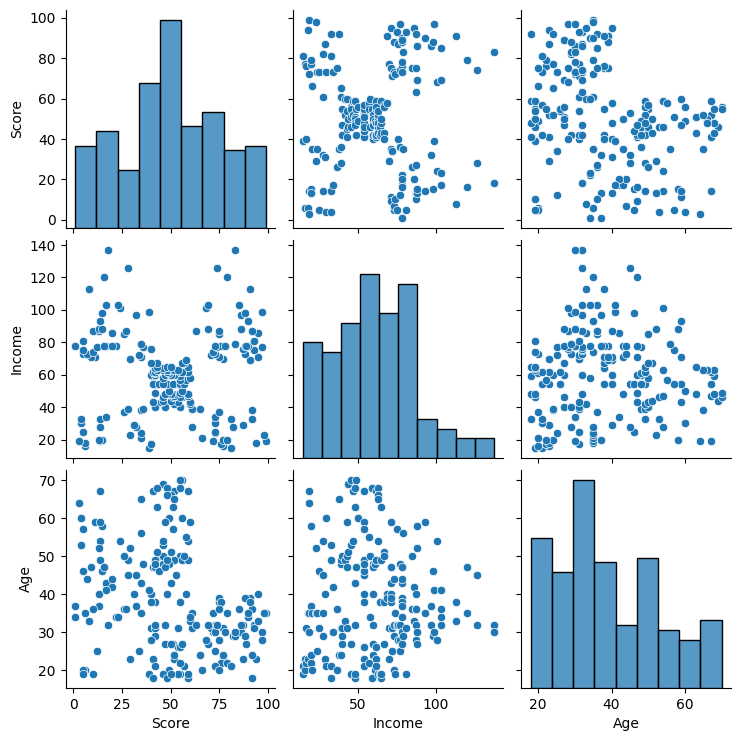

In [40]:
sns.pairplot(df[continous])
plt.show()

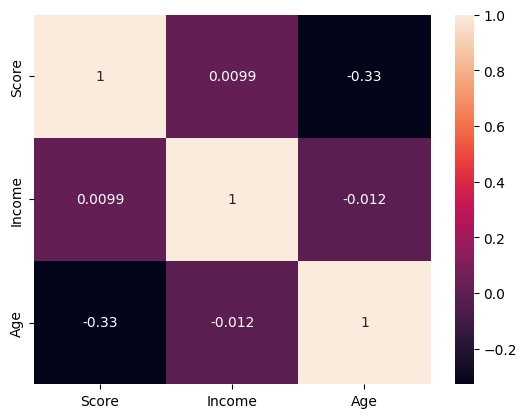

In [43]:
sns.heatmap(df[continous].corr(),annot=True)
plt.show()

In [44]:
df[discrete].describe()

,Gender
count,200
unique,2
top,Female
freq,112


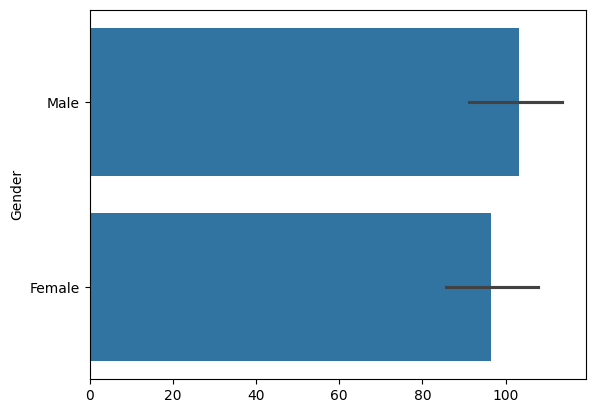

In [50]:
sns.barplot(df['Gender'])
plt.show()

**Data Preparation**

In [52]:
df.isnull().sum()

CustomerID    0
Gender        0
Age           0
Income        0
Score         0
dtype: int64

In [53]:
df.drop(columns = ['CustomerID','Gender','Age'],inplace = True)

**Unsupervised Machine Learning there is no output variable**

In [54]:
X =df

**1. KMeans Clustering**

**Find the optimal number of clusters : Elbow Curve**

In [58]:
import warnings
warnings.simplefilter('ignore')
wcss = []
for k in range(1,11):
  from sklearn.cluster import KMeans
  kmeans = KMeans(n_clusters = k , init = 'k-means++')
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

print(wcss)

[269981.28, 181363.59595959593, 106348.37306211122, 73679.78903948836, 44448.4554479337, 37233.814510710006, 30241.34361793658, 25030.38309852032, 21850.165282585636, 20122.08846476381]


Using Elbow Method

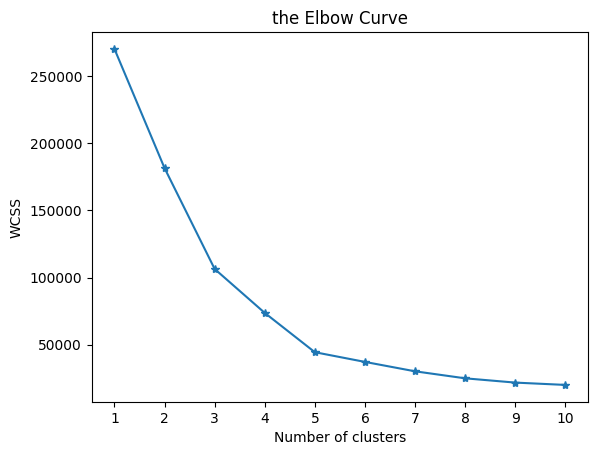

In [59]:
plt.plot(range(1,11) , wcss , marker = '*')
plt.xticks(range(1,11))
plt.title('the Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [60]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 5 , init = 'k-means++',random_state = True)

X['Km_cluster'] = kmeans.fit_predict(X)


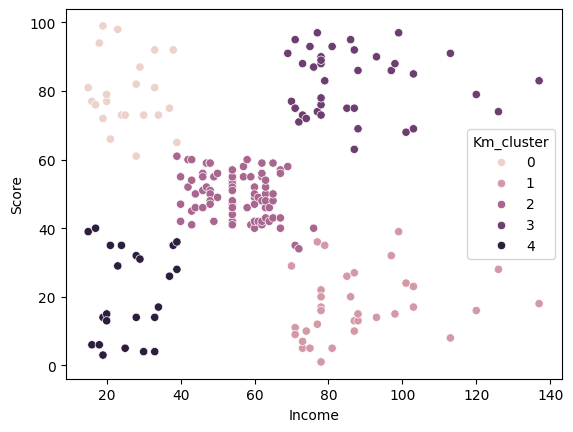

In [62]:
sns.scatterplot(x= 'Income' , y= 'Score', hue = 'Km_cluster',data =df)
plt.show()

**2. hierachical Clustring**

Identify the optimal number of clusters using dendogram

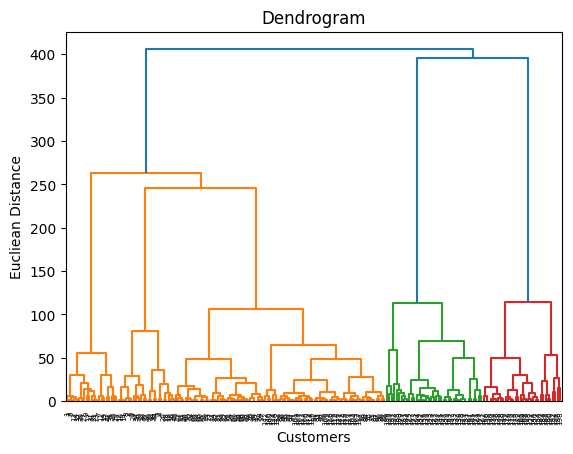

In [66]:
import scipy.cluster.hierarchy as sch
data = sch.linkage(X , method = 'ward')
dendrogram = sch.dendrogram(data)

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Eucliean Distance')
plt.show()

In [69]:
from sklearn.cluster import AgglomerativeClustering

# Correcting the parameter to n_clusters
hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')

X['hc_cluster'] = hc.fit_predict(X)

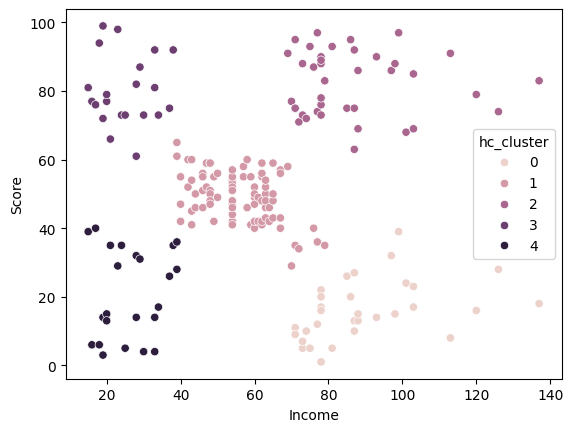

In [70]:
sns.scatterplot(x = 'Income',y='Score', hue = 'hc_cluster',data = df)
plt.show()

**3.DBSCAN Clustering**

In [74]:
for r in range(1,10):
  for m in range(3,10):
    from sklearn.cluster import DBSCAN
    dbs = DBSCAN(eps = r , min_samples = m)
    X['db_scan'] = dbs.fit_predict(X)
  if X['db_scan'].nunique() ==5:
    break

print('eps:',r)
print('min:',m)






eps: 8
min: 9


In [75]:
from sklearn.cluster import DBSCAN
dbs = DBSCAN(eps = 8 , min_samples = 9)
X['db_scan'] = dbs.fit_predict(X)

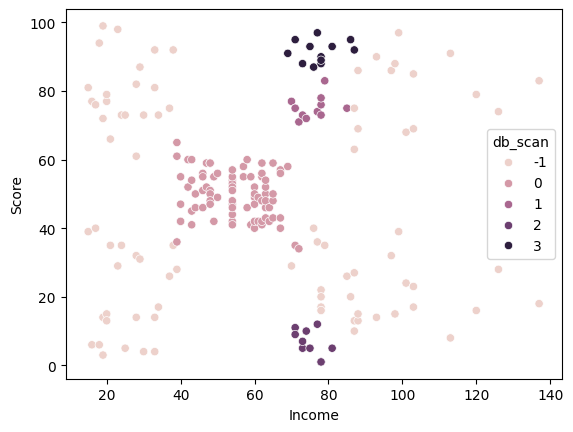

In [76]:
sns.scatterplot(x = 'Income',y='Score', hue = 'db_scan',data = df)
plt.show()